# ДЗ 3
## Задача на предсказание: согласится ли клиент на депозит.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [6]:
df_train = pd.read_csv('data/train.csv', sep=',', encoding='utf8')

In [12]:
df_train.shape

(24712, 22)

In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24712 entries, 0 to 24711
Data columns (total 22 columns):
_id               24712 non-null object
age               24712 non-null int64
job               24712 non-null object
marital           24712 non-null object
education         24712 non-null object
default           24712 non-null object
housing           24712 non-null object
loan              24712 non-null object
contact           24712 non-null object
month             24712 non-null object
day_of_week       24712 non-null object
duration          24712 non-null int64
campaign          24712 non-null int64
pdays             24712 non-null int64
previous          24712 non-null int64
poutcome          24712 non-null object
emp.var.rate      24712 non-null float64
cons.price.idx    24712 non-null float64
cons.conf.idx     24712 non-null float64
euribor3m         24712 non-null float64
nr.employed       24712 non-null float64
target            24712 non-null int64
dtypes: floa

In [10]:
df_test = pd.read_csv('data/test.csv', sep=',', encoding='utf8')

In [11]:
df_test.shape

(16476, 21)

In [29]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16476 entries, 0 to 16475
Data columns (total 21 columns):
_id               16476 non-null object
age               16476 non-null int64
job               16476 non-null object
marital           16476 non-null object
education         16476 non-null object
default           16476 non-null object
housing           16476 non-null object
loan              16476 non-null object
contact           16476 non-null object
month             16476 non-null object
day_of_week       16476 non-null object
duration          16476 non-null int64
campaign          16476 non-null int64
pdays             16476 non-null int64
previous          16476 non-null int64
poutcome          16476 non-null object
emp.var.rate      16476 non-null float64
cons.price.idx    16476 non-null float64
cons.conf.idx     16476 non-null float64
euribor3m         16476 non-null float64
nr.employed       16476 non-null float64
dtypes: float64(5), int64(5), object(11)
memory usa

In [17]:
df_ss = pd.read_csv('data/sample_submission.csv', sep=',', encoding='utf8')

In [27]:
df_ss[df_ss['target']==1]

,_id,target


In [ ]:
_id               24712 non-null object
job               24712 non-null object
marital           24712 non-null object
education         24712 non-null object
default           24712 non-null object
housing           24712 non-null object
loan              24712 non-null object
contact           24712 non-null object
month             24712 non-null object
day_of_week       24712 non-null object
poutcome          24712 non-null object

In [ ]:
_id - идентификатор человека
age - возраст
job - тип работы ("admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
marital - семейное положение ("divorced" (разведенный и овдовевший),"married","single","unknown")
education - уровень образования ("basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
default - есть ли дефолт по кредиту ("no","yes","unknown")
housing - есть ли кредит на жилье ("no","yes","unknown")
loan - есть ли персональный кредит ("no","yes","unknown")
contact - контактный тип связи ("cellular","telephone")
month - последний контактный месяц года ("jan", "feb", "mar", ..., "nov", "dec")
day_of_week - последний контактный день недели ("mon","tue","wed","thu","fri")
duration - длительность последнего контакта в секундах. (Важное замечание: этот атрибут сильно влияет на таргет (например, если длительность - 0 сек., то таргет - 0). Тем не менее, продолжительность не известна до выполнения вызова.
campaign - количество контактов, выполненных для этого клиента в рамках текущей маркетинговой кампании (включая последний контакт)
pdays - количество дней прошедших последнего контакта с клиентом с предыдущей маркетинговой кампании (999 означает, что ранее с клиентом не контактировали)
previous - количество контактов, выполненных до текущей маркетинговой кампании для этого клиента
poutcome - результат предыдущей маркетинговой кампании ("failure","nonexistent","success")
# ниже приведены показатели окружающей среды и банка
emp.var.rate - изменение уровня занятости (квартальный показатель)
cons.price.idx - индекс потребительских цен (ежемесячный показатель)
cons.conf.idx - индекс доверия потребителя (ежемесячный показатель)
euribor3m - курс Euribor (ежедневный показатель)
nr.employed - количество сотрудников (квартальный показатель)
target - целевая переменная (таргет) - согласился ли клиент на вклад (депозит)

#### Объединим две выборки


In [30]:
df_test.loc[:, 'target'] = 2
#добавили столбец и дали ему значение 2 для того, чтобы потом отделить тестовую выборку

In [38]:
df0 = df_test.append(df_train).reset_index(drop=True)

In [36]:
#df=pd.concat([df_train,df_test], ignore_index=True)

In [40]:
df0.shape

(41188, 22)

#### Подготовим данные для ohe

In [85]:
# Удалим '_id'
df=df0.drop(['_id'], axis=1)

In [45]:
df.shape

(41188, 21)

In [95]:
#делаем ohe
df_ohe = pd.get_dummies(df)

In [96]:
#добавляем столбец '_id'
df_ohe.insert(0,'_id',list(df0['_id']))
#передаем это df_ohe_id
df_ohe_id = df_ohe
#возвращаем df_ohe в состояние без '_id'
df_ohe=df_ohe.drop(['_id'], axis=1)

#### Отделяем train от test

In [105]:
df_preproc_id = df_ohe_id.query('target != 2')
df_TEST_id = df_ohe_id.query('target == 2')

#### Создаем из известной части тренировочные выборки X и Y

In [110]:
#Тренировочные выборки
Y=df_preproc_id['target']
X=df_preproc_id.drop(['target','_id'], axis=1)

In [111]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

C:\Users\David\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### KNN

In [114]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
predict_knn = knn.predict(x_test)
predict_knn_prob = knn.predict_proba(x_test)

#### Дерево решений

In [115]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
predict_dtc = dtc.predict(x_test)
predict_dtc_prob = dtc.predict_proba(x_test)

#### Случайный лес

In [116]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
predict_rfc = rfc.predict(x_test)
predict_rfc_prob = rfc.predict_proba(x_test)

#### Логистическая регрессия

In [117]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
predict_lr = lr.predict(x_test)
predict_lr_prob = lr.predict_proba(x_test)

#### Построение roc_auc

(-0.01, 1.01)

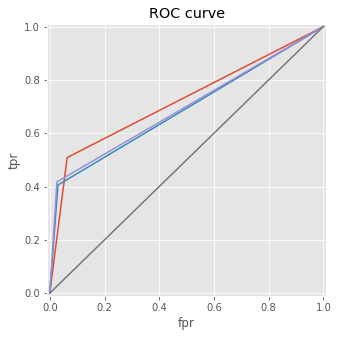

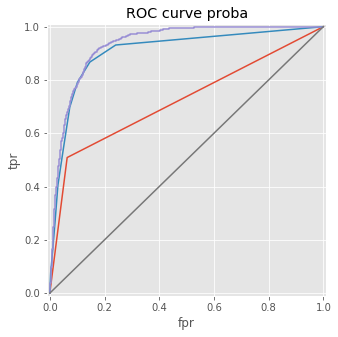

In [120]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr_dtc, tpr_dtc, thresholds = roc_curve(y_test, predict_knn)
fpr_dtc, tpr_dtc, thresholds = roc_curve(y_test, predict_dtc)
fpr_rfc, tpr_rfc, thresholds = roc_curve(y_test, predict_rfc)
fpr_lr, tpr_lr, thresholds = roc_curve(y_test, predict_lr)

fpr_knn_prob, tpr_knn_prob, thresholds = roc_curve(y_test, predict_knn_prob[:,1])
fpr_dtc_prob, tpr_dtc_prob, thresholds = roc_curve(y_test, predict_dtc_prob[:,1])
fpr_rfc_prob, tpr_rfc_prob, thresholds = roc_curve(y_test, predict_rfc_prob[:,1])
fpr_lr_prob, tpr_lr_prob, thresholds = roc_curve(y_test, predict_lr_prob[:,1])

#Строим для без proba
plt.figure(figsize=(5, 5))
plt.plot(fpr_dtc, tpr_dtc)
plt.plot(fpr_rfc, tpr_rfc)
plt.plot(fpr_lr, tpr_lr)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

#Строим для proba
plt.figure(figsize=(5, 5))
plt.plot(fpr_dtc_prob, tpr_dtc_prob)
plt.plot(fpr_rfc_prob, tpr_rfc_prob)
plt.plot(fpr_lr_prob, tpr_lr_prob)

plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve proba')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [121]:
print('roc_auc_knn',roc_auc_score(y_test, predict_knn))
print('roc_auc_dts',roc_auc_score(y_test, predict_dtc))
print('roc_auc_rfc',roc_auc_score(y_test, predict_rfc))
print('roc_auc_lr',roc_auc_score(y_test, predict_lr))
print('roc_auc_knn_prob',roc_auc_score(y_test, predict_knn_prob[:,1]))
print('roc_auc_dts_prob',roc_auc_score(y_test, predict_dtc_prob[:,1]))
print('roc_auc_rfc_prob',roc_auc_score(y_test, predict_rfc_prob[:,1]))
print('roc_auc_lr_prob',roc_auc_score(y_test, predict_lr_prob[:,1]))

roc_auc_knn 0.6946855526268139
roc_auc_dts 0.7227180683375838
roc_auc_rfc 0.6880090508765194
roc_auc_lr 0.6957664550354528
roc_auc_knn_prob 0.8967948061804331
roc_auc_dts_prob 0.7227180683375838
roc_auc_rfc_prob 0.9067818028567596
roc_auc_lr_prob 0.9331008513088082


#### Кросс валидация

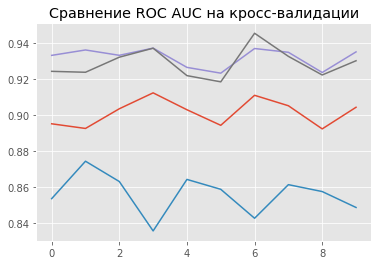

In [127]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

knn1 = KNeighborsClassifier(n_neighbors=10)
dtc1 = DecisionTreeClassifier(max_depth=10)
rfc1 = RandomForestClassifier(max_depth=10)
lr1 = LogisticRegression()
plt.title('Сравнение ROC AUC на кросс-валидации')

plt.plot(cross_val_score(knn1,X,Y,scoring='roc_auc',cv=10))
plt.plot(cross_val_score(dtc1,X,Y,scoring='roc_auc',cv=10))
plt.plot(cross_val_score(rfc1,X,Y,scoring='roc_auc',cv=10))
plt.plot(cross_val_score(lr1,X,Y,scoring='roc_auc',cv=10))

Вывод
Лучшие результаты дает логистическая регрессия и случайный лес

#### Анализ изменения данных

Посмотрим, как изменится модель после удаления данных по столбцу 'duration'

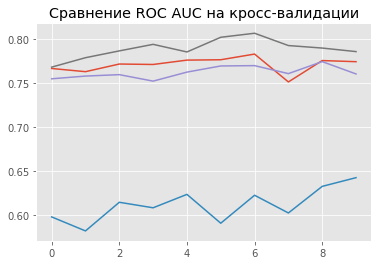

In [131]:
df_preproc_id = df_ohe_id.query('target != 2')
df_TEST_id = df_ohe_id.query('target == 2')
#Тренировочные выборки
Y=df_preproc_id['target']
X=df_preproc_id.drop(['target','_id','duration'], axis=1) # удаляем duration

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

knn1 = KNeighborsClassifier(n_neighbors=20)
dtc1 = DecisionTreeClassifier(max_depth=20)
rfc1 = RandomForestClassifier(max_depth=20)
lr1 = LogisticRegression()
plt.title('Сравнение ROC AUC на кросс-валидации')

plt.plot(cross_val_score(knn1,X,Y,scoring='roc_auc',cv=10))
plt.plot(cross_val_score(dtc1,X,Y,scoring='roc_auc',cv=10))
plt.plot(cross_val_score(rfc1,X,Y,scoring='roc_auc',cv=10))
plt.plot(cross_val_score(lr1,X,Y,scoring='roc_auc',cv=10))

Изменилась не на много